# Chapter 7 - Exercise 2: Absenteeism_at_work

## Cho dữ liệu Absenteeism_at_work trong tập tin Absenteeism_at_work.csv
## Yêu cầu: Hãy đọc dữ liệu từ tập tin này, áp dụng Random Forest để thực hiện việc xác định thời gian vắng mặt theo giờ (Absenteeism time in hours (target)) dựa trên các thông tin được cung cấp.

## Chi tiết:
1. Đọc dữ liệu. Chuẩn hóa dữ liệu
2. Tạo X_train, X_test, y_train, y_test từ dữ liệu chuẩn hóa với tỷ lệ dữ liệu test là 0.3
3. Áp dụng Random Forest, Tìm kết quả
4. Kiểm tra độ chính xác
5. Tìm các thuộc tính quan trọng nhất trong tập dữ liệu
6. Trực quan hóa thuộc tính quan trọng
7. Áp dụng lại Random Forest dựa trên các thuộc tính quan trọng, tìm kết quả
8. Kiểm tra độ chính xác
9. Tự cho 1 dữ liệu X_test mới. Ví dụ như: ['Reason for absence', 'Work load Average per day', 'Age', 'Month of absence', 'Day of the week', 'Hit target', 'Transportation expense', 'Weight', 'Seasons', 'Height', 'Distance from Residence to Work', 'Son', 'Pet', 'Service time'] ứng với [ 10., 205.917, 28.,8., 4., 92., 330. , 84., 1., 182., 16., 0., 0., 4.]. Tìm kết quả Y test.

## Attribute Information:
1. Individual identification (ID)
2. Reason for absence (ICD). Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:
3. I Certain infectious and parasitic diseases
4. II Neoplasms
5. III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
6. IV Endocrine, nutritional and metabolic diseases
7. V Mental and behavioural disorders
8. VI Diseases of the nervous system
9. VII Diseases of the eye and adnexa
10. VIII Diseases of the ear and mastoid process
11. IX Diseases of the circulatory system
12. X Diseases of the respiratory system
13. XI Diseases of the digestive system
14. XII Diseases of the skin and subcutaneous tissue
15. XIII Diseases of the musculoskeletal system and connective tissue
16. XIV Diseases of the genitourinary system
17. XV Pregnancy, childbirth and the puerperium
18. XVI Certain conditions originating in the perinatal period
19. XVII Congenital malformations, deformations and chromosomal abnormalities
20. XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
21. XIX Injury, poisoning and certain other consequences of external causes
22. XX External causes of morbidity and mortality
23. XXI Factors influencing health status and contact with health services.

## And 7 categories without (CID) patient follow-up (XXII), medical consultation (XXIII), blood donation (XXIV), laboratory examination (XXV), unjustified absence (XXVI), physiotherapy (XXVII), dental consultation (XVIII).
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)
pd.set_option('future.no_silent_downcasting', True)

In [4]:
absent = pd.read_csv('Data/Absenteeism_at_work.csv', sep = ';')
absent

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [5]:
absent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average per day        740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

## <span style='color:yellow'> Build RandomForestRegressor

Accuracy on train set: 0.4232802975759986
Accuracy on test  set: 0.21975580474756473

Mean squared error test set: 137.07993175933333
Mean absolute error test set: 4.95856089244912



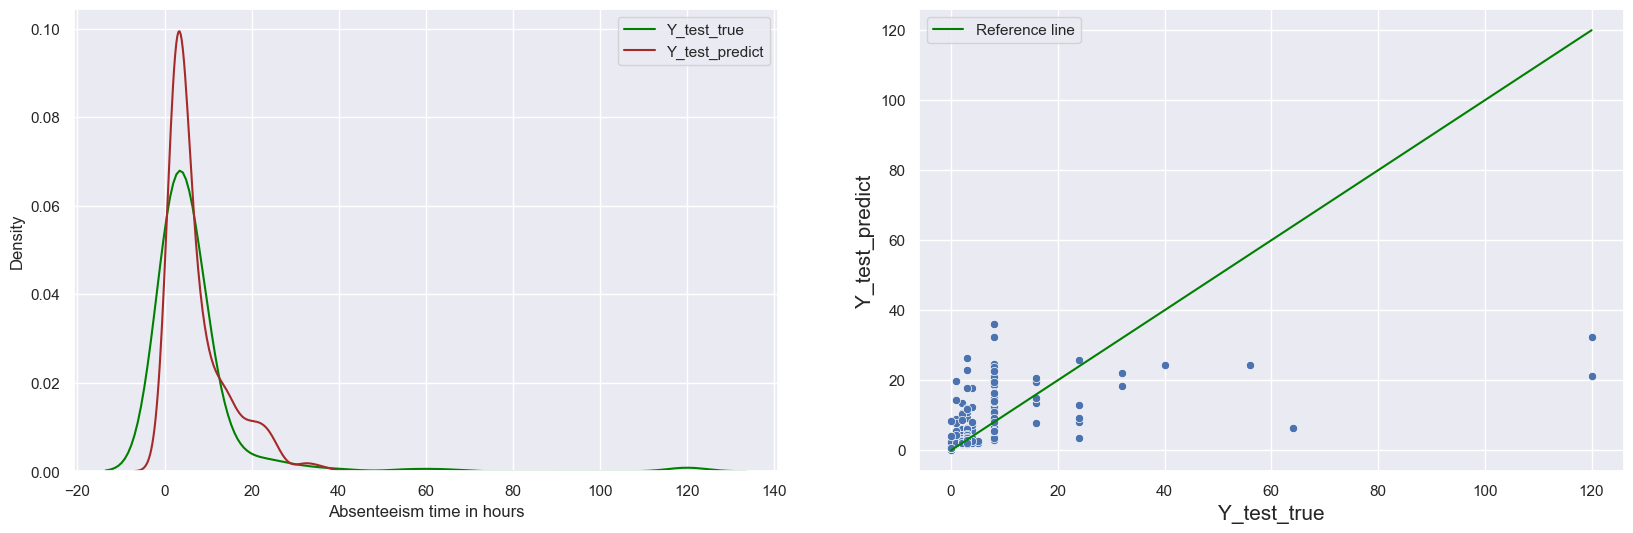


The accuracy on both train set and test set are very low, the graphs also indicate that the model is bad.


In [8]:
x = absent.drop(['Absenteeism time in hours', 'ID'], axis=1)
y = absent['Absenteeism time in hours']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

#########################

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

forestR = RandomForestRegressor(random_state=1, min_samples_split=20).fit(x_train, y_train)
forestR.fit(x_train, y_train)

y_test_pred = forestR.predict(x_test)

print(f'Accuracy on train set: {forestR.score(x_train, y_train)}')
print(f'Accuracy on test  set: {forestR.score(x_test, y_test)}')
print()

print(f'Mean squared error test set: {mean_squared_error(y_test, y_test_pred)}')
print(f'Mean absolute error test set: {mean_absolute_error(y_test, y_test_pred)}')
print()

sbn.set_theme(style='darkgrid')
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sbn.kdeplot(y_test, label = "Y_test_true", color = 'green')
sbn.kdeplot(y_test_pred, label = "Y_test_predict", color = 'brown')
plt.legend()

plt.subplot(1,2,2)
sbn.lineplot(x = [y_test.min(), y_test.max()], y = [y_test.min(), y_test.max()], label = 'Reference line', color = 'green')
sbn.scatterplot(x = y_test, y = y_test_pred)
plt.xlabel("Y_test_true", size=15)
plt.ylabel("Y_test_predict", size=15)
plt.show()

print('\nThe accuracy on both train set and test set are very low, the graphs also indicate that the model is bad.')

## <span style='color:yellow'> Select best features

                            Feature     Score  Cumulative_Percentage
0                Reason for absence  0.343392               0.343392
1                               Age  0.164238               0.507630
2         Work load Average per day  0.108732               0.616362
3            Transportation expense  0.063554               0.679916
4                        Hit target  0.058824               0.738740
5                               Son  0.047562               0.786302
6                  Month of absence  0.042479               0.828781
7                            Height  0.038444               0.867225
8                            Weight  0.033613               0.900838
9   Distance from Residence to Work  0.020436               0.921274
10                  Day of the week  0.019689               0.940963
11                   Social drinker  0.016749               0.957712
12                     Service time  0.015182               0.972893
13                  Body mass inde

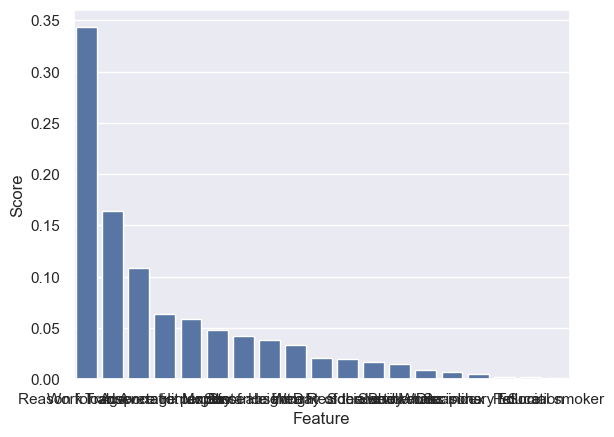


Choose these features for new random forest: ['Reason for absence', 'Age', 'Work load Average per day', 'Transportation expense', 'Hit target']


In [12]:
df_features_scores = pd.DataFrame({
    'Feature':x_train.columns,
    'Score':forestR.feature_importances_
})

df_features_scores = df_features_scores.sort_values('Score', ascending=False)
df_features_scores = df_features_scores.reset_index(drop = True)

df_features_scores['Cumulative_Percentage'] = np.cumsum(df_features_scores['Score']) / df_features_scores['Score'].sum()

print(df_features_scores)

print()

sbn.barplot(data = df_features_scores, x = 'Feature', y = 'Score')
plt.show()


best_features =  list(df_features_scores.loc[df_features_scores['Score'] > 0.05, 'Feature'].values)
print('\nChoose these features for new random forest:', best_features)

## <span style='color:yellow'> New forest with best features ['sex', 'fare', 'pclass', 'age']

Accuracy on train set: 0.3853007238899906
Accuracy on test  set: 0.1928275433901786

Mean squared error test set: 141.81091758624325
Mean absolute error test set: 4.721727135176128



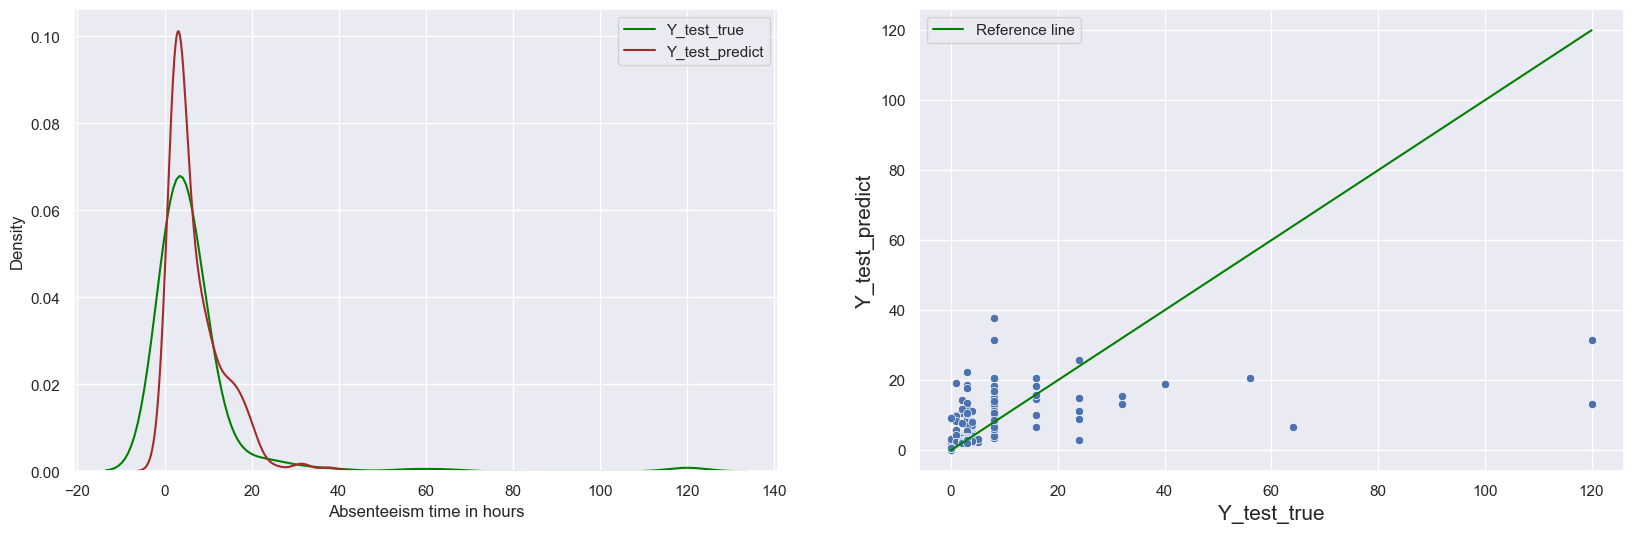


Even after using only best features, the results are still bad


In [39]:
x = absent[best_features]
y = absent['Absenteeism time in hours']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

#########################

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

forestR = RandomForestRegressor(random_state=1, min_samples_split=20).fit(x_train, y_train)
forestR.fit(x_train, y_train)

y_test_pred = forestR.predict(x_test)

print(f'Accuracy on train set: {forestR.score(x_train, y_train)}')
print(f'Accuracy on test  set: {forestR.score(x_test, y_test)}')
print()

print(f'Mean squared error test set: {mean_squared_error(y_test, y_test_pred)}')
print(f'Mean absolute error test set: {mean_absolute_error(y_test, y_test_pred)}')
print()

sbn.set_theme(style='darkgrid')
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sbn.kdeplot(y_test, label = "Y_test_true", color = 'green')
sbn.kdeplot(y_test_pred, label = "Y_test_predict", color = 'brown')
plt.legend()

plt.subplot(1,2,2)
sbn.lineplot(x = [y_test.min(), y_test.max()], y = [y_test.min(), y_test.max()], label = 'Reference line', color = 'green')
sbn.scatterplot(x = y_test, y = y_test_pred)
plt.xlabel("Y_test_true", size=15)
plt.ylabel("Y_test_predict", size=15)
plt.show()

print('\nEven after using only best features, the results are still bad')

## <span style='color:yellow'> Binning the output 'Absenteeism time in hours' into 3 intervals ['Low', 'Medium', 'High']
## <span style='color:yellow'> Regressor => Classifier

In [42]:
absent = pd.read_csv('Data/Absenteeism_at_work.csv', sep = ';')

absent_hours_bins = [-np.inf, 
                     np.quantile(absent['Absenteeism time in hours'], 0.5), 
                     np.quantile(absent['Absenteeism time in hours'], 0.75),
                     absent['Absenteeism time in hours'].max()]

absent['Absent_hours_level'] = pd.cut(absent['Absenteeism time in hours'], absent_hours_bins, labels = ['low', 'medium', 'high'])

absent

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Absent_hours_level
0,11,26,7,3,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,4,medium
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,0,0,98,178,31,0,low
2,3,23,7,4,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,low
3,7,7,7,5,1,279,5,14,39,239.554,...,1,2,1,1,0,68,168,24,4,medium
4,11,23,7,5,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,2,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,1,2,1,0,1,90,172,30,8,medium
736,1,11,7,3,1,235,11,14,37,264.604,...,3,1,0,0,1,88,172,29,4,medium
737,4,0,0,3,1,118,14,13,40,271.219,...,1,1,1,0,8,98,170,34,0,low
738,8,0,0,4,2,231,35,14,39,271.219,...,1,2,1,0,2,100,170,35,0,low


In [44]:
absent['Absent_hours_level'].value_counts()

Absent_hours_level
low       401
medium    276
high       63
Name: count, dtype: int64

In [46]:
x = absent.drop(['Absenteeism time in hours', 'ID', 'Absent_hours_level'], axis=1)
y = absent['Absent_hours_level']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

#########################

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

forestC = RandomForestClassifier(min_samples_split = 20, random_state=1)

forestC.fit(x_train, y_train)

y_test_pred = forestC.predict(x_test)

print(f'Accuracy on train set: {forestC.score(x_train, y_train)}')
print(f'Accuracy on test  set: {forestC.score(x_test, y_test)}')
print()

cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
print(f'\nConfusion matrix:\n {cm_df}')
print()
print(f'\nClassification report:\n {classification_report(y_test, y_test_pred, zero_division=np.nan)}')

Accuracy on train set: 0.8023648648648649
Accuracy on test  set: 0.6756756756756757


Confusion matrix:
    0   1   2
0  1   4   9
1  0  69  11
2  1  23  30


Classification report:
               precision    recall  f1-score   support

        high       0.50      0.07      0.12        14
         low       0.72      0.86      0.78        80
      medium       0.60      0.56      0.58        54

    accuracy                           0.68       148
   macro avg       0.61      0.50      0.50       148
weighted avg       0.65      0.68      0.65       148



## <span style='color:yellow'> After binning, the accuracy scores and other metrics have improved